In [1]:
import os.path

import matplotlib.pyplot as plt
import numpy as np
import h5py
import yaml
import pandas as pd

quad_pv_name = "AWA:Bira3Ctrl:Ch10"
tdc_pv_name = "pi:QBCR1:Ch7:EnablePulse"
dipole_pv_name = "AWA:Bira4Ctrl:Ch01"

def read_file(fname):
    with h5py.File(fname) as f:
        images = f["images"][:]

    return images

folder = "/home/awa/awa_data/12-05_6DReconstruction/beamsize_minimization/"
run_data = yaml.safe_load(open(os.path.join(folder, "beamsize_minimization.yml")))
run_data = pd.DataFrame(run_data["data"])
run_data


,AWA:Bira3Ctrl:Ch11,AWA:Bira4Ctrl:Ch10,AWA:Bira4Ctrl:Ch11,Cx,Cy,Sx,Sy,bb_penalty,log10_total_intensity,save_filename,total_intensity,total_size,xopt_error,xopt_runtime
0,-1.060000,-0.920000,0.640000,316.164765,177.037567,9.067416,6.489390,-148.121047,8.547195,/home/awa/awa_data/12-05_6DReconstruction/beam...,352529192.0,13.728372,False,2.566442
1,-1.058841,-0.966801,0.640934,NaN,NaN,NaN,NaN,NaN,8.543876,/home/awa/awa_data/12-05_6DReconstruction/beam...,349845600.0,NaN,False,2.725297
10,-1.017566,-0.879622,0.650344,315.789366,177.747334,8.631661,11.795049,-133.837683,8.549285,/home/awa/awa_data/12-05_6DReconstruction/beam...,354229480.0,17.779433,False,2.618880
11,-1.045046,-0.864537,0.626088,309.790496,182.956446,7.580209,7.588392,-150.024819,8.545190,/home/awa/awa_data/12-05_6DReconstruction/beam...,350905032.0,10.734005,False,2.550016
12,-1.072525,-0.849452,0.601831,NaN,NaN,NaN,NaN,NaN,8.540601,/home/awa/awa_data/12-05_6DReconstruction/beam...,347216936.0,NaN,False,2.621852
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,-1.089102,-0.850189,0.661432,311.751823,178.320289,6.209123,7.344304,-148.110405,8.543109,/home/awa/awa_data/12-05_6DReconstruction/beam...,349227912.0,10.752458,False,2.570830
61,-1.083374,-0.847374,0.658178,310.709471,180.767775,7.257039,8.922650,-144.708517,8.544099,/home/awa/awa_data/12-05_6DReconstruction/beam...,350024656.0,13.166841,False,2.603488
7,-1.125042,-0.847586,0.625169,NaN,NaN,NaN,NaN,NaN,8.541114,/home/awa/awa_data/12-05_6DReconstruction/beam...,347627664.0,NaN,False,2.659574
8,-1.107030,-0.840311,0.656132,NaN,NaN,NaN,NaN,NaN,8.543472,/home/awa/awa_data/12-05_6DReconstruction/beam...,349520136.0,NaN,False,2.603448


In [2]:
# get minimized beam fname
#fname = run_data["save_filename"][run_data["total_size"].idxmin()]
#fname = run_data["save_filename"][50]
fname = "/home/awa/awa_data/12-05_6DReconstruction/13ARV1_1701820020.h5"

In [3]:
images = read_file(fname)
images.shape

(5, 700, 700)

In [4]:
fname

'/home/awa/awa_data/12-05_6DReconstruction/13ARV1_1701820020.h5'

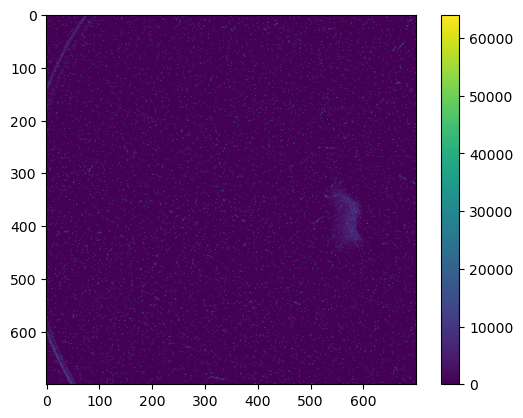

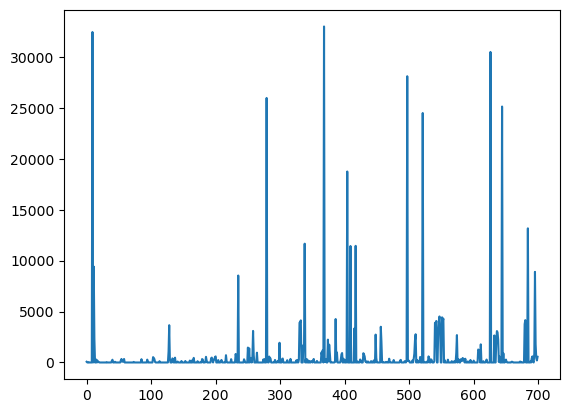

In [5]:
#images[images == 0] = np.max(images)
plt.imshow(images[0])
plt.colorbar()
plt.figure()
plt.plot(images[0][:,300])

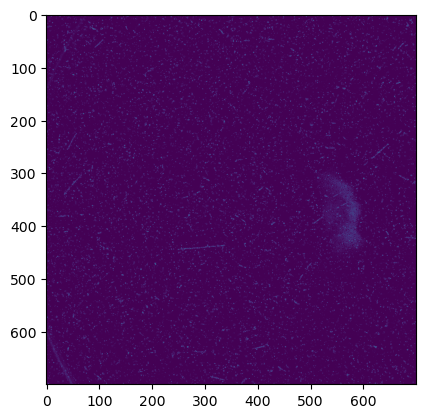

In [11]:
plt.imshow(images.std(axis=0))

In [7]:
images[0] == 0.0

array([[ True, False,  True, ...,  True, False, False],
       [False, False,  True, ...,  True,  True, False],
       [False,  True,  True, ...,  True,  True,  True],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [False,  True, False, ...,  True,  True, False],
       [ True,  True,  True, ...,  True, False, False]])

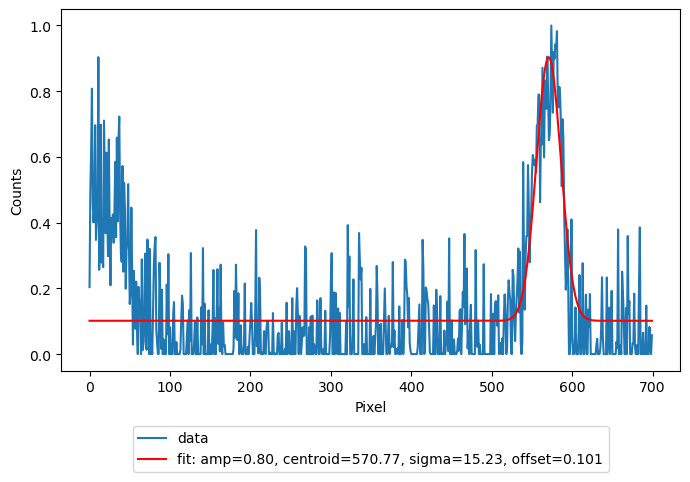

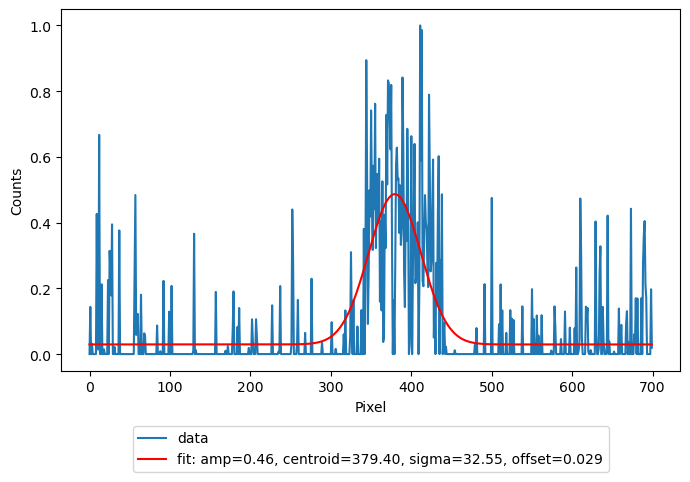

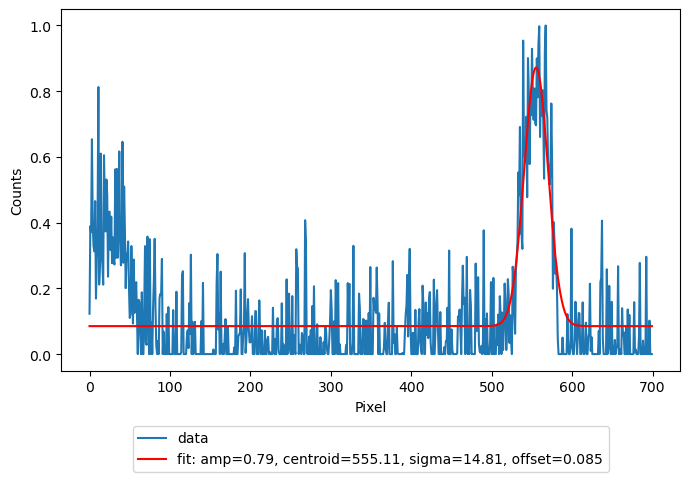

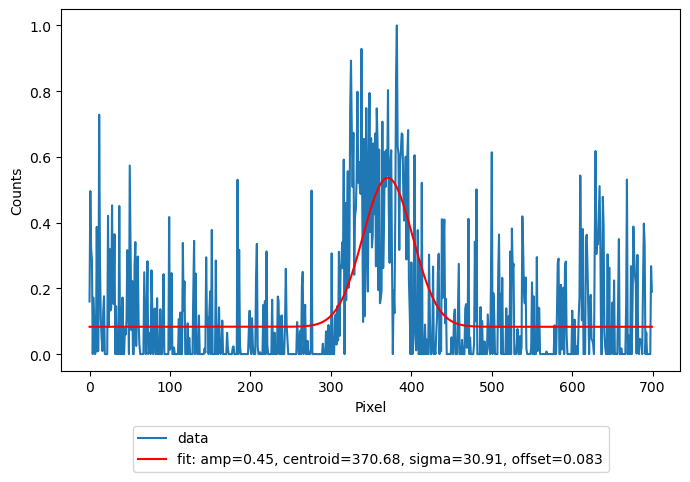

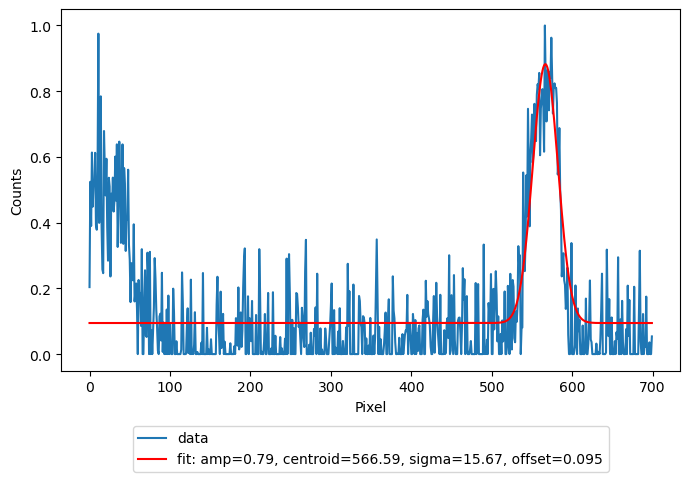

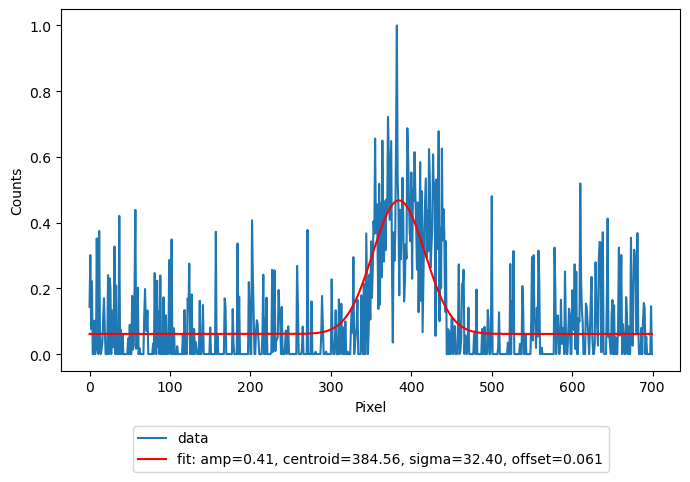

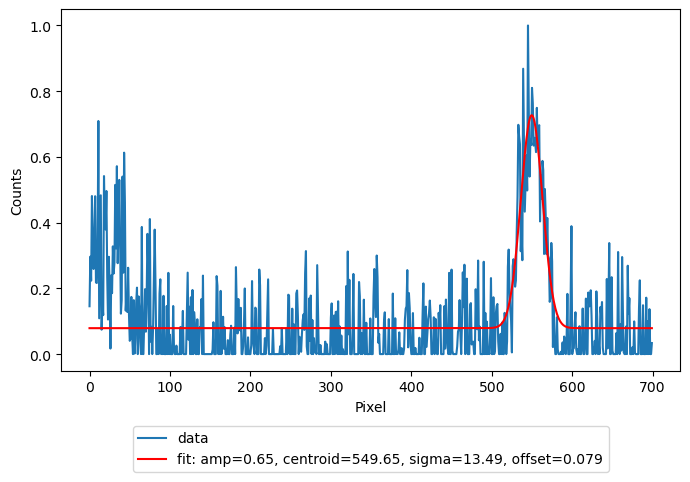

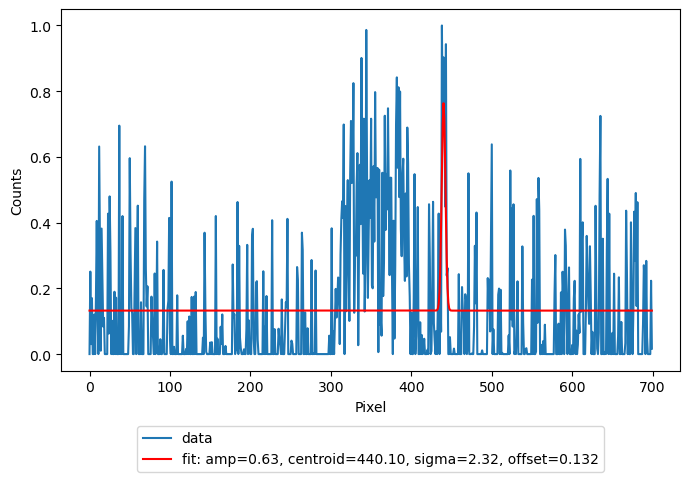

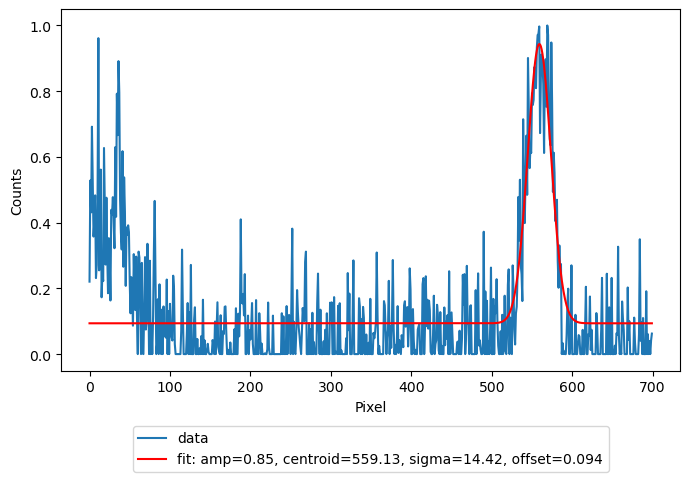

In [ ]:
import sys
sys.path.append("../../")
from plugins.interfaces.utils.fitting_methods import fit_gaussian_linear_background
for image in images:
    x_projection = image.sum(axis=0)
    y_projection = image.sum(axis=1)
    
    para_x = fit_gaussian_linear_background(
                x_projection, visualize=True, n_restarts=10
            )
    para_x = fit_gaussian_linear_background(
                y_projection, visualize=True, n_restarts=10
            )

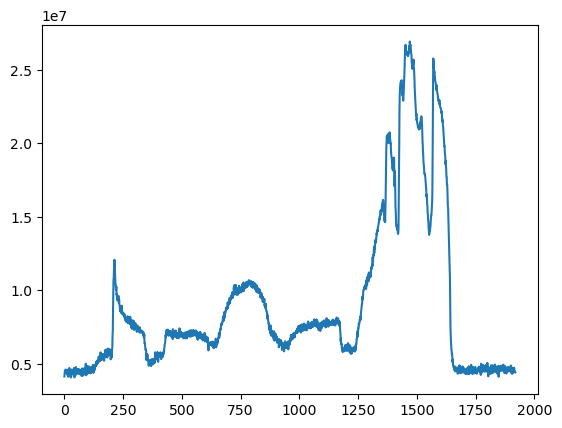

In [9]:
test_image = read_file("/home/awa/awa_data/12-05_6DReconstruction/YAG_centering/DYG14_test.h5")[0]
test_image[test_image == 0] = np.max(test_image)
plt.plot(test_image.sum(axis=0))

In [10]:
test_image[575,750].replace(0.0, np.max(test_image))

AttributeError: 'numpy.float64' object has no attribute 'replace'